# Project 2 part 1

### Import packages

### Load image

### Convert to grayscale

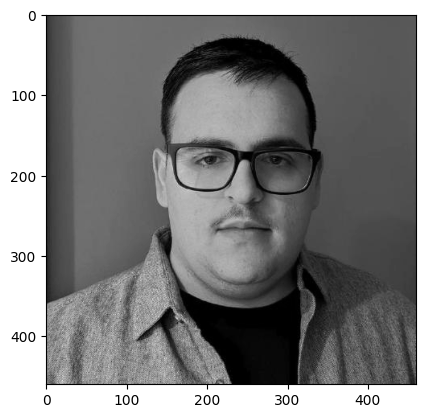

In [166]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV (only for loading)
img = cv2.imread('amir.jpg')

# Convert the image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# display the image
plt.imshow(img, cmap='gray')

### Gaussian_filter

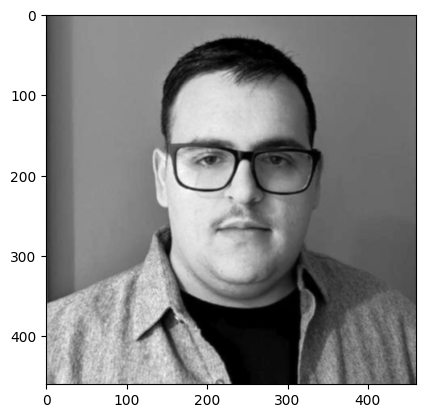

In [167]:
# Gaussian filter for noise reduction
gaussian_filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]],dtype=np.float32) * 1/16

imgGaus = cv2.filter2D(img,-1, gaussian_filter)

# display the image
plt.imshow(imgGaus, cmap='gray')


### Sobel operators

In [168]:
# Define the Sobel operators
sobel_x = np.array(([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]]),
                     dtype=np.float64)


sobel_y = np.array(([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]]),
                        dtype=np.float64)


###  Define Convolution function

In [169]:
# Function to apply convolution with replicate padding to maintain the size
def convolve(image, kernel):
    # Get the dimensions of the input image and the kernel
    image_height = image.shape[0]
    image_width = image.shape[1]
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]

    # Calculate the padding size to maintain the output size
    padding_height = kernel_height // 2
    padding_width = kernel_width // 2

    # Create an output matrix to store the convolution result
    output_image = np.zeros((image_height, image_width))

    # Pad the image with replicate values
    padded_image = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width)), mode='edge')

    # Loop through the padded image
    for i in range(image_height):
        for j in range(image_width):
            # Extract the patch from the padded image that corresponds to the kernel size
            patch = padded_image[i:i + kernel_height, j:j + kernel_width]

            # Perform the convolution by element-wise multiplication and summing the result
            output_image[i, j] = np.sum(patch * kernel)

    return output_image

### Apply convolution

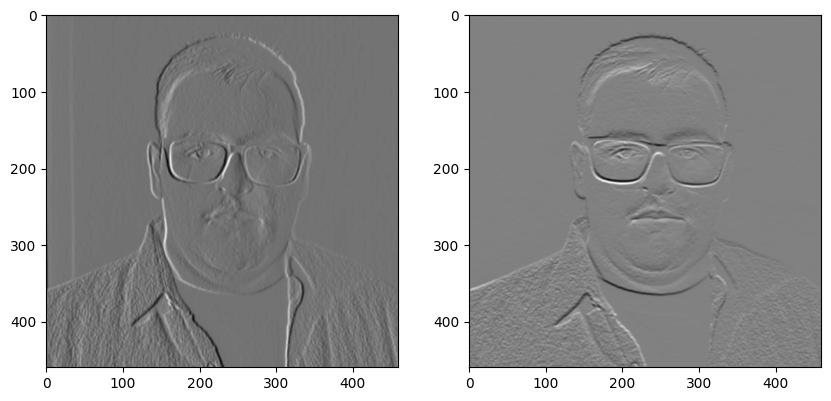

In [170]:
# Apply Sobel filters to the image
sobel_x_image = convolve(imgGaus, sobel_x)
sobel_y_image = convolve(imgGaus, sobel_y)

#show the two images side by side
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(sobel_x_image, cmap='gray')
plt.subplot(122)
plt.imshow(sobel_y_image, cmap='gray')


### Calculate magnitude

In [171]:
# Calculate the magnitude
magnitude = np.sqrt(sobel_x_image ** 2 + sobel_y_image ** 2)

### Thresholding

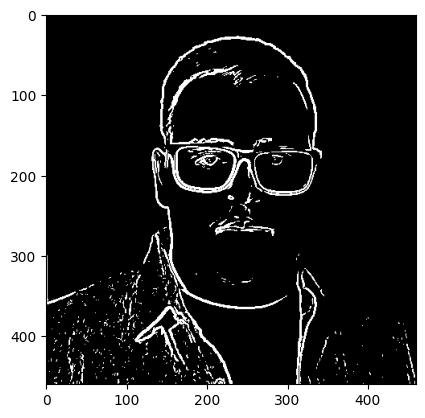

In [172]:
# Thresholding
threshold = 100  # You can adjust the threshold value as needed
binary_image = (magnitude > threshold).astype(np.uint8) * 255

# Display the binary image
plt.imshow(binary_image, cmap='gray')

### Results

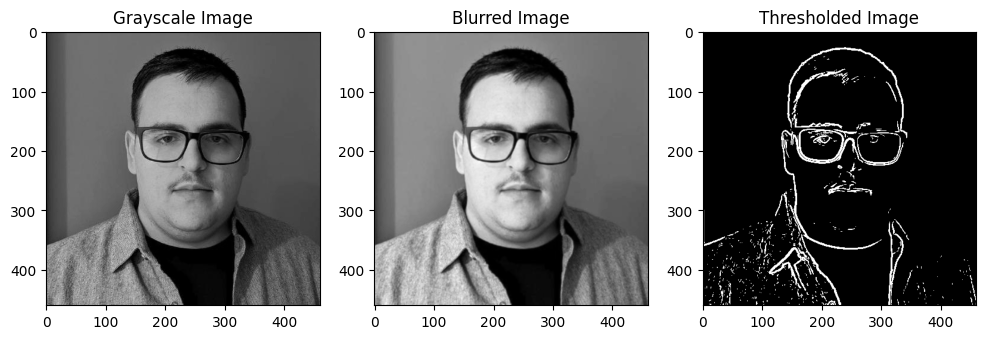

In [173]:
# Display the results
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(132), plt.imshow(imgGaus, cmap='gray'), plt.title('Blurred Image')
plt.subplot(133), plt.imshow(binary_image, cmap='gray'), plt.title('Thresholded Image')
plt.show()


# Project 2 part 2

### Photos provided [here](https://cs.brown.edu/courses/csci1430/2021_Spring/proj1_imagefiltering/)

### Convert to grayscale

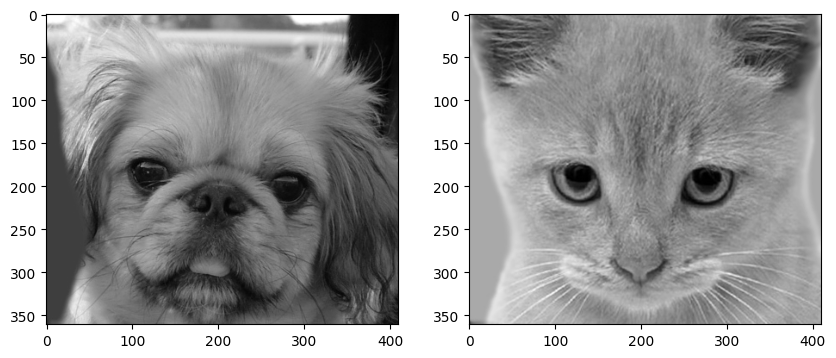

In [174]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#load the dog and cat images
dog = cv2.imread('dog.jpg')
cat = cv2.imread('cat.jpg')

#convert the images to grayscale
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)

#display the images
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(dog, cmap='gray')
plt.subplot(122)
plt.imshow(cat, cmap='gray')


### apply gaussian filter

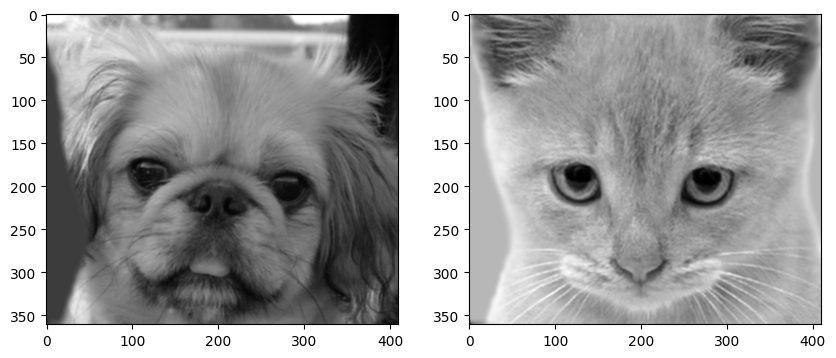

In [175]:
# imgGaus = cv2.filter2D(img,-1, gaussian_filter)

# # display the image
dogGaus = cv2.filter2D(dog,-1, gaussian_filter)
catGaus = cv2.filter2D(cat,-1, gaussian_filter)

# display the images
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(dogGaus, cmap='gray')
plt.subplot(122)
plt.imshow(catGaus, cmap='gray')

### High pass and Low pass filters

In [176]:
# High Pass and Low Pass Filters
# High Pass Filter (fine details)
cat_high_pass = cat - catGaus
dog_high_pass = dog - dogGaus

# Low Pass Filter (smooth features)
cat_low_pass = catGaus
dog_low_pass = dogGaus

### Concentraiton

In [177]:
low_pass_weight = 0.75  # 75% contribution
high_pass_weight = 0.25  # 25% contribution

### Create the hybrid images

In [178]:
cat_dog_hybrid = (low_pass_weight * cat_low_pass) + (high_pass_weight * dog_high_pass) # 75% cat + 25% dog
dog_cat_hybrid = (low_pass_weight * dog_low_pass) + (high_pass_weight * cat_high_pass) # 75% dog + 25% cat

### Final Results

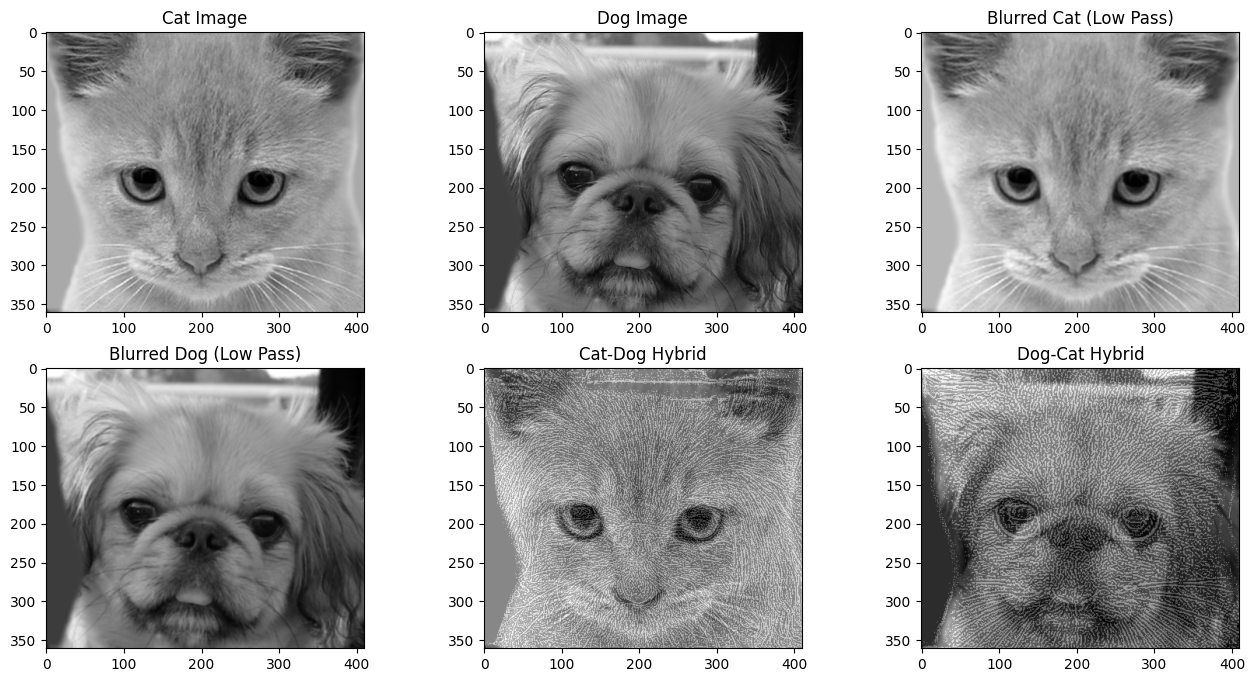

In [179]:


# Display Results
plt.figure(figsize=(16, 8))
plt.subplot(231), plt.imshow(cat, cmap='gray'), plt.title('Cat Image')
plt.subplot(232), plt.imshow(dog, cmap='gray'), plt.title('Dog Image')
plt.subplot(233), plt.imshow(catGaus, cmap='gray'), plt.title('Blurred Cat (Low Pass)')
plt.subplot(234), plt.imshow(dogGaus, cmap='gray'), plt.title('Blurred Dog (Low Pass)')
plt.subplot(235), plt.imshow(cat_dog_hybrid, cmap='gray'), plt.title('Cat-Dog Hybrid')
plt.subplot(236), plt.imshow(dog_cat_hybrid, cmap='gray'), plt.title('Dog-Cat Hybrid')
plt.show()